**IMPORTING PYTHON LIBRARIES**

In [ ]:
%matplotlib inline
from IPython.display import HTML
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier


labelenc=LabelEncoder()
stdsclr = StandardScaler()

**READING THE DATASET**

In [ ]:
Data=pd.read_csv("/content/Mumbai_Final.csv")[['Location','Price','Area','No. of Bedrooms']]
Data.head()

FileNotFoundError: ignored

**LABEL ENCODER**

A label encoder is used to encode the string values to integers so that they can be passed to the models.

In [ ]:
labelenc.fit(Data['Location'])
Mapping=dict(zip(labelenc.classes_, labelenc.transform(labelenc.classes_)))
print(Mapping)
print(len(Mapping))

NameError: ignored

**MENTIONING THE INPUT OUTPUT VARIABLES**

In [ ]:
Data['Location'] = labelenc.fit_transform(Data['Location'])
Data.head()
Data_input = Data[['Price', 'Area','No. of Bedrooms']]
Data_output = Data['Location']

**SPLITTING THE DATA INTO TRAINING AND TESTING DATASET**


In [ ]:
train_ip, test_ip, train_op, test_op = train_test_split(Data_input,Data_output, test_size = 0.20, random_state = 0)
train_ip=stdsclr.fit_transform(train_ip)
test_ip=stdsclr.fit_transform(test_ip)

**LOGISTIC REGRESSION MODEL**

In [ ]:
log_reg=linear_model.LogisticRegression(max_iter=200)
log_reg.fit(train_ip,train_op)

LogisticRegression(max_iter=200)

In [ ]:
pred_op=log_reg.predict(test_ip)
print(pred_op)

[4 8 9 4 4 7 7 4 7 4 7 8 7 4 9 4 8 4 7 8 4 4 4 8 7 8 8 0 9 8 8 4 9 8 7 7 8
 9 9 4 8 8 7 8 8 4 7 8 4 7 9 4 4 4 8 8 4 8 4 4 9 8 8 7 9 7 8 7 4 4 8 8 8 8
 7 4 7 7 9 8 8 7 4 7 9 0 0 8 4 8 4 4 4 7 8 4 9 4 4 4 4 7 4 4 4 8 5 8 8 7 4
 0 4 8 4 8 8 9 8 8 4 8 4 4 8 9 0 0 8 4 8 8 8 9 8 4 8 6 8 8 4 8 8 4 8 4 8 7
 8 7 9 4 7 4 9 4 8 8 8 0 8 8 4 8 7 4 8 4 7 4 8 8 7 8 4 8 4 0 8 9 8 4 7 7 4
 0 4 7 4 4 7 8 7 8 9 7 7 7 4 9 4 9 8 8 8 8 8 7 7 9 0 8 4 8 4 8 9 4 8 7 7 0
 0 4 4 8 4 9 8 0 9 6 5 4 4 8 4 8 4 8 8 4 8 8 7 7 8 4 8 8 9 4 9 4 8 0 8 4 8
 4 8 5 4 8 9 0 4 4 8 4 4 4 8 4 8 8 0 4 8 8 8 8 9 8 8 4 9 4 7 9 8 4 8 8 7 4
 8 4 8 8 4 9 8 7 4 4 8 4 8 4 4 9 7 0 7 9 8 4 8 8 9 8 4 7 7 4 4 7 4 4 4 4 7
 4 4 4 7 4 4 8 8 0 9 8 4 8 8 8 4 8 9 8 8 7 4 4 7 4 7 9 8 8 8 4 9 4 4 8 0 5
 8 7 9 8 9 9 8 7 9 4 8 8 4 9 6 4 8 9 8 4 5 7 4 8 4 8 4 7 7 8 9 8 9 8 8 0 8
 9 4 7 0 4 9 8 9 7 8 8 0 8 4 8 7 8 4 4 8 0 9 4 7 0 8 9 7 9 8 8 8 9 4 8 9 7
 8 4 4 9 8 4 9 8 4 8 4 8 8 8 9 9 4 7 4 7 8 4 9 4 4 7 0 4 9 8 4 4 4 8 8 8 8
 0 4 8 8 9 8 4 9 8 8 8 9 

Text(0.5, 23.52222222222222, 'Predicted label')

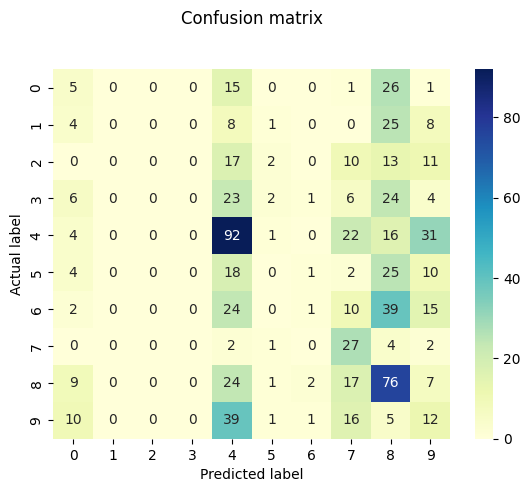

In [ ]:
cm=confusion_matrix(test_op,pred_op)
fig, ax = plt.subplots()
classes = [i for i in range(301)]
#tick_marks = arange(len(classes))
#plt.xticks(test_op, classes)
#plt.yticks(pred_op, classes)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
acc_reg = accuracy_score(test_op, pred_op)
print(acc_reg)

0.27099236641221375


**NAIVE BAYES CLASSIFIER**

In [ ]:
nb = GaussianNB()
nb.fit(train_ip, train_op)
pred_op=nb.predict(test_ip)

In [ ]:
acc=accuracy_score(test_op, pred_op)
print(acc)

0.23027989821882952


Text(0.5, 23.52222222222222, 'Predicted label')

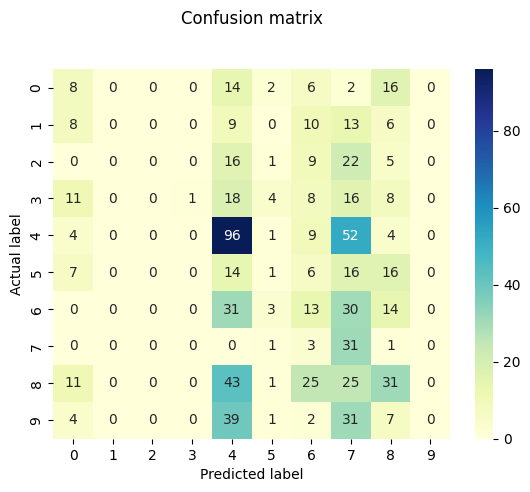

In [ ]:
cm=confusion_matrix(test_op,pred_op)
fig, ax = plt.subplots()
classes = [i for i in range(301)]
#tick_marks = arange(len(classes))
#plt.xticks(test_op, classes)
#plt.yticks(pred_op, classes)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**K-NEAREST NEIGHBORS**

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(train_ip,train_op)
pred_op=knn1.predict(test_ip)
print(accuracy_score(test_op, pred_op))

0.24936386768447838


Text(0.5, 23.52222222222222, 'Predicted label')

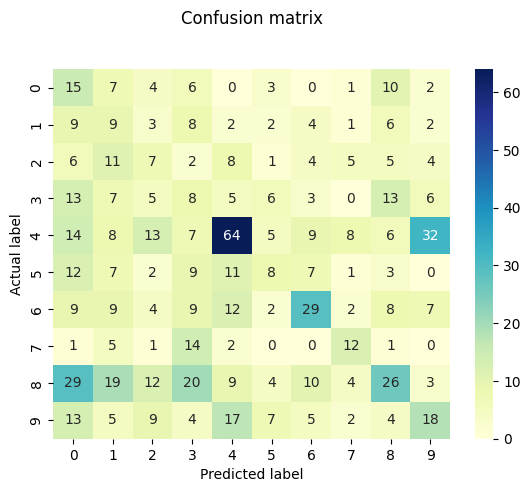

In [ ]:
cm=confusion_matrix(test_op,pred_op)
fig, ax = plt.subplots()
classes = [i for i in range(301)]
#tick_marks = arange(len(classes))
#plt.xticks(test_op, classes)
#plt.yticks(pred_op, classes)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(train_ip,train_op)
pred_op=knn2.predict(test_ip)
print(accuracy_score(test_op, pred_op))


0.2964376590330789


In [ ]:
print(knn2.predict([[7837000, 1866, 3]]))

[5]


Text(0.5, 23.52222222222222, 'Predicted label')

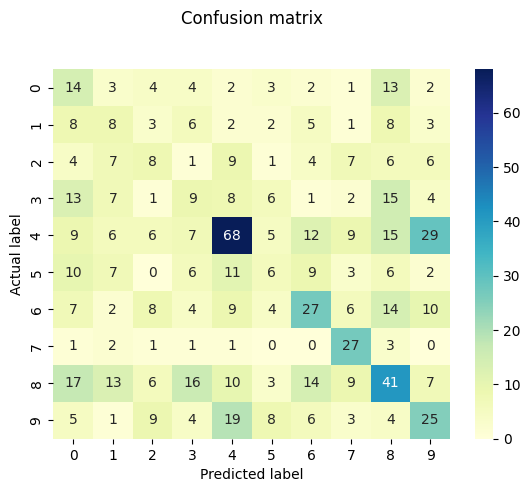

In [ ]:
cm=confusion_matrix(test_op,pred_op)
fig, ax = plt.subplots()
classes = [i for i in range(301)]
#tick_marks = arange(len(classes))
#plt.xticks(test_op, classes)
#plt.yticks(pred_op, classes)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**SUPPORT-VECTOR-MACHINE**

In [ ]:
model = svm.SVC()
model.fit(train_ip, train_op)
pred_op = model.predict(test_ip)

In [ ]:
print(accuracy_score(test_op, pred_op))

0.32188295165394404


Text(0.5, 23.52222222222222, 'Predicted label')

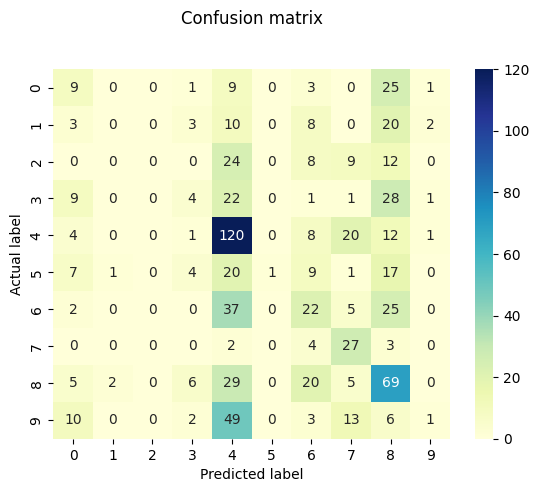

In [ ]:
cm=confusion_matrix(test_op,pred_op)
fig, ax = plt.subplots()
classes = [i for i in range(301)]
#tick_marks = arange(len(classes))
#plt.xticks(test_op, classes)
#plt.yticks(pred_op, classes)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**DECISION TREE**

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_ip,train_op)
pred_op = dt_clf.predict(test_ip)
print(accuracy_score(test_op, pred_op))

0.20737913486005088


Text(0.5, 23.52222222222222, 'Predicted label')

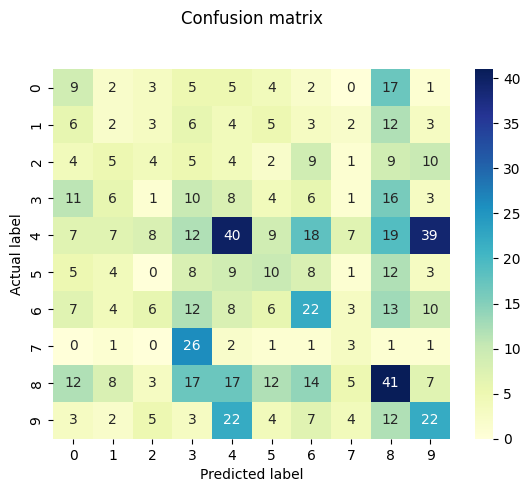

In [ ]:
cm=confusion_matrix(test_op,pred_op)
fig, ax = plt.subplots()
classes = [i for i in range(301)]
#tick_marks = arange(len(classes))
#plt.xticks(test_op, classes)
#plt.yticks(pred_op, classes)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')